In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("Online Retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Filling The missing

In [5]:
id_num = df["CustomerID"].unique().tolist()  # remove NaN before getting unique
id_num.sort()  # sort the list in-place
print(id_num)  # display the sorted customer IDs


[12346.0, 12347.0, 12348.0, 12349.0, 12350.0, 12352.0, 12353.0, 12354.0, 12355.0, 12356.0, 12357.0, 12358.0, 12359.0, 12360.0, 12361.0, 12362.0, 12363.0, 12364.0, 12365.0, 12367.0, 12371.0, 12372.0, 12373.0, 12374.0, 12375.0, 12378.0, 12379.0, 12380.0, 12381.0, 12384.0, 12388.0, 12390.0, 12391.0, 12394.0, 12395.0, 12397.0, 12398.0, 12399.0, 12401.0, 12402.0, 12403.0, 12405.0, 12406.0, 12407.0, 12408.0, 12409.0, 12410.0, 12412.0, 12414.0, 12418.0, 12420.0, 12421.0, 12422.0, 12424.0, 12425.0, 12426.0, 12428.0, 12430.0, 12431.0, 12432.0, 12435.0, 12436.0, 12437.0, 12438.0, 12442.0, 12444.0, 12445.0, 12446.0, 12447.0, 12448.0, 12449.0, 12450.0, 12451.0, 12452.0, 12453.0, 12454.0, 12455.0, 12456.0, 12457.0, 12458.0, 12461.0, 12462.0, 12463.0, 12464.0, 12465.0, 12468.0, 12471.0, 12472.0, 12473.0, 12475.0, 12477.0, 12478.0, 12479.0, 12488.0, 12490.0, 12491.0, 12492.0, 12493.0, 12497.0, 12498.0, 12502.0, 12504.0, 12505.0, 12506.0, 12507.0, 12508.0, 12509.0, 12510.0, 12512.0, 12513.0, 12514.0, 

In [6]:
df[df["CustomerID"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,10.79,NaN,United Kingdom


In [7]:
existing_ids = df["CustomerID"].dropna().astype(int)

# Get all IDs from min to max
full_range = set(range(existing_ids.min(), existing_ids.max() + 1))

# Find missing IDs in the sequence
missing_ids = sorted(full_range - set(existing_ids))

print(f"Found {len(missing_ids)} missing CustomerIDs")
print("Sample:", missing_ids[:10])

Found 1570 missing CustomerIDs
Sample: [12351, 12366, 12368, 12369, 12376, 12382, 12385, 12387, 12389, 12392]


In [8]:
# Step 1: Get missing count
num_missing = df["CustomerID"].isna().sum()

# Step 2: Get used IDs and find gaps
used_ids = df["CustomerID"].dropna().astype(int).unique()
max_id = used_ids.max()
all_possible_ids = set(range(1, max_id + 1))
gaps = sorted(list(all_possible_ids - set(used_ids)))

# Step 3: Fill gaps and add new IDs if needed
extra_needed = num_missing - len(gaps)
new_ids = gaps + list(range(max_id + 1, max_id + 1 + extra_needed))

# Step 4: Fill missing CustomerIDs
df.loc[df["CustomerID"].isna(), "CustomerID"] = new_ids[:num_missing]
df["CustomerID"] = df["CustomerID"].astype(int)  # optional, make all int

In [9]:
print("✅ Still missing CustomerIDs:", df["CustomerID"].isna().sum())

✅ Still missing CustomerIDs: 0


In [10]:
# Fill missing descriptions based on matching StockCode
desc_map = df[df["Description"].notna()].drop_duplicates(subset="StockCode")[["StockCode", "Description"]].set_index("StockCode")["Description"]
df["Description"] = df.apply(
    lambda row: desc_map[row["StockCode"]] if pd.isna(row["Description"]) and row["StockCode"] in desc_map else row["Description"],
    axis=1
)

In [11]:
print("✅ Still missing Descriptions:", df["Description"].isna().sum())

✅ Still missing Descriptions: 112


In [12]:
mode_description = df['Description'].mode()[0]
df['Description']=df['Description'].fillna(mode_description)

In [13]:
print("✅ Still missing Descriptions:", df["Description"].isna().sum())

✅ Still missing Descriptions: 0


In [14]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='mixed', dayfirst=False, errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 31.0+ MB


## RFM

In [17]:
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [18]:
df["TotalAmount"]=df["UnitPrice"]*df["Quantity"]

In [19]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,    # Recency
    "InvoiceNo": "nunique",                                      # Frequency
    "TotalAmount": "sum"                                         # Monetary
})

In [20]:
rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalAmount": "Monetary"
}, inplace=True)

In [21]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139452 entries, 1 to 139452
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Recency    139452 non-null  int64  
 1   Frequency  139452 non-null  int64  
 2   Monetary   139452 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.7 MB


In [22]:
# Recency: lower is better, so use qcut with ascending=False
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

# Frequency: higher is better
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Monetary: higher is better
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

In [23]:
def segment_customer(row):
    if row["R_Score"] >= 4 and row["F_Score"] >= 4:
        return "Loyal Customer"
    elif row["R_Score"] >= 4:
        return "Recent Customer"
    elif row["F_Score"] >= 4:
        return "Frequent Buyer"
    else:
        return "Other"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)

In [24]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Segment
CustomerID,,,,,,,
1,374,1,0.00,1,1,1,Other
2,373,1,2.51,1,1,2,Other
3,373,1,5.02,1,1,3,Other
4,373,1,3.40,1,1,2,Other
5,373,1,3.32,1,1,2,Other
...,...,...,...,...,...,...,...
139448,1,1,20.65,5,5,5,Loyal Customer
139449,1,1,16.52,5,5,5,Loyal Customer
139450,1,1,4.96,5,5,3,Loyal Customer


In [25]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139452 entries, 1 to 139452
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Recency    139452 non-null  int64   
 1   Frequency  139452 non-null  int64   
 2   Monetary   139452 non-null  float64 
 3   R_Score    139452 non-null  category
 4   F_Score    139452 non-null  category
 5   M_Score    139452 non-null  category
 6   Segment    139452 non-null  object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 5.2+ MB


In [26]:
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

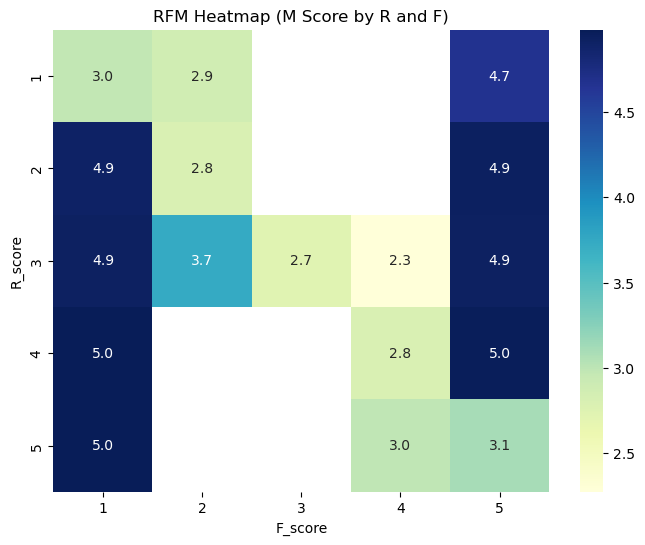

In [27]:
heatmap_data = rfm.groupby(['R_Score', 'F_Score'])['M_Score'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("RFM Heatmap (M Score by R and F)")
plt.ylabel("R_score")
plt.xlabel("F_score")
plt.show()

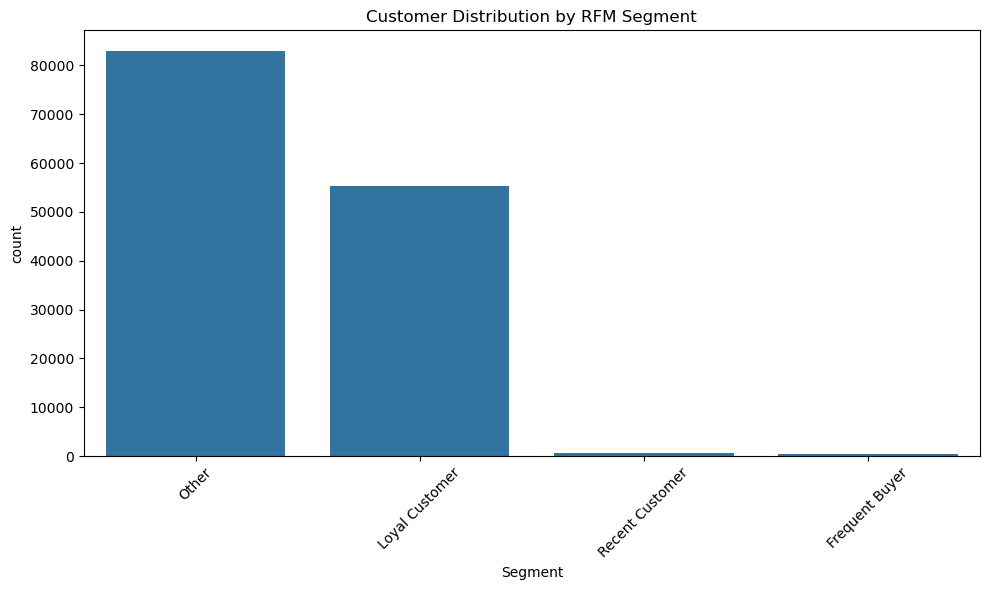

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Distribution by RFM Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
with pd.ExcelWriter("Retail(UIC).xlsx") as writer:
    df.to_excel(writer,sheet_name="Main",index=False)
    rfm.to_excel(writer,sheet_name="RFM",index=True)